# Aykırı Gözlem

 Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere "aykırı gözlem" denir. Ya da Aykırı değeri barındıran gözlem birimine "aykırı gözlem" denir.

 Aykırılığı ifade eden nümerik değere "aykırı değer" denir.

 Aykırı gözlem uğraşacak olduğumuz problemler içersinideki en ciddisidir.

 Aykırı değerler genellenebilirilik kaygısı ile oluşturulan kural setlerini ya da fonksiyonlarını yanıltır. Yanlılığa sebep olur.
 Örneğin fonksiyonun genelini betimlediğimiz doğrunun eğimi aykırı gözlemsiz negatifken, aykırı gözlemli olduğunda pozitif olabilir. Yani modeli bozuyor çünkü geneli yanlış etkiliyor (allta dediğimiz son madde -> istisna)


# Kime Göre Neye Göre Aykırı

 Veri setinin genel eğiliminin dışına çıkmayı nasıl tanımlarız?
 - Sektör bilgisi
 - Standrat sapma yaklaşımı (bir değişkenin ortalamasının üzerine 1,2 veya 3 standart sapma değeri eklenir ve bu eşik değer olarak düşünülür. Bu değerden yukarıda veya aşağıda olan değerler aykırıdır.)
 - Z-skoru yaklaşımı (Standart sapma yöntemine benzer şekilde çalışır. Değişken standart normal dağılıma uyarlanır, yani standartlaştırılır. Sonrasında -örneğin- dağılımın sağından ve solundan + 2,5 değerine göre bir eşik değer konulur ve bu değerin üzerinde ya da altında olan değerler aykırı değer olarak işaretlenir.)
 - Boxplot yöntemi (En sık kullanılan yöntemlerden birisidir. Değişkenin değerleri küçükten büyüğe sıralanır. Çeyrekliklerine (yüzdekliklerine) yani Q1,Q3 değerlerine karşılık değeler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.) (IQR = 1.5 * Q3-Q1) , (Alt Eşik = Q1-IQR) , (Üst Eşik = Q3+IQR)

 Eğer kurulan modelin bir genelleme kaygısı varsa (ki olmalı. Bu yüzden yapıyoruz) zaten çok seyrek olan senaryolar ve genele uymayan yapılar çalışmaya dahil edilmememli. -> istisnalar modele dahil edilmemeli (ayrkırılar)

# Aykırı Değerleri Yakalamak

In [5]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64" , "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Veri setinin içerisinden table değişkenini seçtik (aykırı gözlemi yakalamayı görmek için)

df_table = df["table"]
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

<Axes: xlabel='table'>

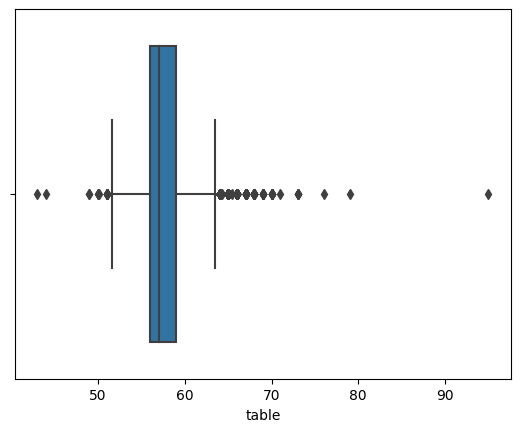

In [8]:
# Boxplat yardımıyla aykırı gözlemi bulmak için table değişkenini görselleştirelim

sns.boxplot(x=df_table )

# (En sol ve en sağ çizgilerin dışındakiler aykırı değerlerimiz çıkacak.)

In [10]:
# Bir eşik değer belirlemeliyiz. Aslında grafikteki değerlerin doğru olduğunu el yordamıyla gördük

Q1 = df_table.quantile(0.25)    # veri seti küçükten büyüğe sıralandığında %25. sırasına denk gelen değeri alacak. -> grafikteki mavinin sol çizgisi
Q3 = df_table.quantile(0.75)    # -> grafikteki mavinin sağ çizgisi
IQR = Q3-Q1     # IQR = interquantile (nicelik arası)

print("Q1 değer:" , Q1)
print("Q3 değer:" , Q3)
print("IQR değer:" , IQR)

alt_sınır = Q1 - 1.5*IQR    # -> min değer dediğimiz yer yani en soldaki çizgi
üst_sınır = Q3 + 1.5*IQR    # -> max değer dediğimiz yer yani en sağdaki çizgi
print("Alt sınır:" , alt_sınır)
print("Üst sınır:" , üst_sınır)



Q1 değer: 56.0
Q3 değer: 59.0
IQR değer: 3.0
Alt sınır: 51.5
Üst sınır: 63.5


In [12]:
# Aykırı değer sorgulaması yapıyoruz

(df_table < alt_sınır) | (df_table > üst_sınır)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [13]:
aykırı_tf = (df_table < alt_sınır)
aykırı_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [15]:
# Şimdi bu şartı sağlayan elemanların kendilerine yani değerlerine ulaşalım. Yani aykırı gözlemleri görelim

df_table[aykırı_tf]     # -> aykırı_tf = (df_table < alt_sınır)

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [16]:
# Bu değerlerin sadece indexlerine de erişebiliriz.

df_table[aykırı_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

 # Aykırı Değer Problemini Çözmek

In [26]:
# İlk yaklaşımımız -> Silme

import pandas as pd

type(df_table)  # -> series türündeydi dataframe yapıyoruz
df_table = pd.DataFrame(df_table)
print("İlk matris boyutu: " , df_table.shape)

temiz_df = df_table[~((df_table < alt_sınır) | (df_table > üst_sınır)).any(axis = 1)]  # tilda sembolü (~) koşulu sağlamayanları al demek yani C#'daki ! gibi tersliği belirtiyor. Meselea burada alt sınır aşağısını ve üst sınır yukarısı hariç alacak
# axis = 1 dememizin sebebi sütun bazında işlem yapmak için , any ise herhangi birisi için demek
print(temiz_df)     # aykırı sonuçlar hariç yazdırdık.
print("Aykırılar silindiğinde matris boyutu: " , temiz_df.shape)

İlk matris boyutu:  (53940, 1)
       table
0       55.0
1       61.0
3       58.0
4       58.0
5       57.0
...      ...
53935   57.0
53936   55.0
53937   60.0
53938   58.0
53939   55.0

[53335 rows x 1 columns]
Aykırılar silindiğinde matris boyutu:  (53335, 1)


In [27]:
# İkinci yaklaşımımız -> Ortalama ile doldurma

import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64" , "int64"])
df = df.dropna()
df.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [28]:
df_table = df["table"]

In [29]:
aykırı_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [30]:
df_table[aykırı_tf]     # alt sınırın altındaki aykırı değerler

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [31]:
df_table.mean()

57.45718390804598

In [32]:
df_table[aykırı_tf] = df_table.mean()   # alt sınır altındaki tüm aykırı değerlere table değişkeninin ortalamasını verdik

C:\Users\Bedirhan Örseloğlu\AppData\Local\Temp\ipykernel_10852\3233085114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_tf] = df_table.mean()


In [33]:
df_table[aykırı_tf]    

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [34]:
# Son yaklaşımımız -> Baskılama (aykırılar yakalandıktan sonra üst sınırın üstündeyse üst sınıra, alt sınırın altındaysa alt sınıra eşitlenir)

import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64" , "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df_table = df["table"]

In [36]:
df_table[aykırı_tf]     # aykırı_tf = df_table < alt_sınır

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [37]:
df_table[aykırı_tf] = alt_sınır     # Alt sınır altındaki aykırı değerleri alt sınıra eşitledik.

C:\Users\Bedirhan Örseloğlu\AppData\Local\Temp\ipykernel_10852\3912541408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_tf] = alt_sınır     # Alt sınır altındaki aykırı değerleri alt sınıra eşitledik.


# Çok Değişkenli Aykırı Gözlem Analizi

Örneğin yaş değerlerimiz 17-20-70-80 , evlililk sayısı değerlerimi 1-2-3 ama iki veriyi birlikte incelediğimizde 17 yaşındaki biri 3 kez evlenmiş gibi çıkabilir. Bu da aykırı bir değerdir.
Yani tek tek incelendiğinde aykırılık belirtmeyen değerler eş zamanlı çok değişkenle birlikte incelendiğinde aykırılık belirtebilir. Bunu çözmek için "LOF" yöntemi kullanılır.

    Local Outlier Factor (LOF):

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.
Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştınlıyor.
Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor.Dolayısıyla burada bir komşuluk yapısı söz konusu. 
Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.


In [11]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include=["float64" , "int64"])
df = diamonds.copy()
df = df.dropna()
df.head()



,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [12]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20 , contamination=0.1)    # contamination yoğunluğu temsil ediyor.
clf.fit_predict(df)     # çalıştırdık. Çıkan sonuçta herbir gözlem birimi için elde edilmiş yoğunluk skorları (LOF skorları) olacak.

array([-1, -1, -1, ...,  1,  1,  1])

In [13]:
df_scores = clf.negative_outlier_factor_
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [19]:
np.sort(df_scores)[0:20]    # bu skorlara bakarak bir eşik değer belirliyoruz. Bu skora göre diğer skorları aykırı değer olarak tanımlayacağız.

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [21]:
esik_değer = np.sort(df_scores)[13]      # df_scores'u sıraladıktan sonraki 13. değeri eşik değer olarak kabul ettik.

In [23]:
aykırı_tf = df_scores > esik_değer  # aykırı olmayan değerler çünkü eşik değerimin üzerinde
aykırı_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [25]:
# Silme yöntemi uyguluyoruz

yeni_df = df[df_scores > esik_değer]    # eşik değerin üzerindeki bütün değerleri aldık -> aykırı olmayan değerlere eriştik
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [26]:
df[df_scores < esik_değer]  # bunlar ise aykırı değerlerimiz

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [30]:
# Baskılama yöntemi 

# Adımları:
# - Aykırı değerleri bir değişkende tuttuk
# - Aykırı değişkenlerin index değerlerini silip baskı değerimize (eşik değerimize) atadık
#- Sonuçta ortaya aykırı değerler yerine eşik değerler atandı
# - Daha sonra bunu tekrardan indexledik (indexlerken dataframe'e dönüştürürken index atribute'umuza aykırı değerlerimizin index değerlerini verdik ki atanan değerler aykırı değerlerin index değerlerine yerleşsin)

baskı_değeri =  df[df_scores == esik_değer]
aykırılar = df[~aykırı_tf]      # aykırı_tf = df_scores > esik_değer ; ~aykırı_tf = df_scores < esik_değer -> aykırı değerler
aykırılar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [31]:
res = aykırılar.to_records(index=False)         # Elimizdeki mevcut aykırıların yerine eşik değerdeki değerleri atayacağımızdan bazı index problemleri ortaya çıkıyor. Bunu gidermeye çalışıyoruz.
                                                # Burada yaptığımız aykırılar dataframe'ini (bir üstteki) index'siz bir array'e çeviriyoruz.

                                                # Bunu  yaptıktan sonra atama işlemini gerçekleştireceğiz.
                                                # Son basamakta da aykırı değerleri baskı değeri ile değiştirmiş olacağız.

res[:] = baskı_değeri.to_records(index=False)   # Atama işlemi yapıyoruz. Dikkat et res aykırıların index'siz array'e çevirilmiş haliydi. Burada da res'teki tüm elemanları baskı değerinin index'siz haline eşitliyoruz.

res     # Gördüğümüz gibi bütün aykırıların yerine eşik değerimizin (baskı_değeri) değerlerini tüm değişkenlerdeki değerlerini doldurmuş olduk (aykırı değerlerin yerine eşik değeri atadık.)

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [32]:
df[~aykırı_tf]  # Şimdiki problemimiz ise şu anda aykırılarda bir değişiklik yok (görüldüğü üzere).

# Dolayısıyla oluşturduğumuz array'i gerçek veri setimizle birleştirmemiz gerekiyor. Bunun içinde oluşturduğumuz array'i önce dataframe'e dönüştürmeliyiz. Daha sonrasında bu değerleri yerine atamalıyız.

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [34]:
import pandas as pd

df[~aykırı_tf] = pd.DataFrame(res , index=df[~aykırı_tf].index)     # Oluşturduğumuz array'i önce dataframe'e dönüştürüyoruz. (res = aykırılar.to_records(index=False) -> aykırılar dataframe'ini (bir üstteki) index'siz bir array'e çeviriyoruz.)
                                                                    # İndexlerini de aykırı değerlerin index'i olarak veriyoruz ki aykırıların yerine atama yapsın

df[~aykırı_tf]      # Gördüğümüz gibi aykırı değerlerin yerine eşik değerimiz (baskı_değeri) geldi ve işlemi bitirdik.

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
